In [1]:
import os
import glob
from cropclassification.classification_model import crop_classifier
from cropclassification.classification_model import model_evaluator
from importlib import reload

## 1. Crop classification model
This code will run the Artificial Neural Network to map crop types and validate the classification with:
- Confusion matrix
- F-score
- Producer's accuracy
- User's accuracy


### 1.1 ANN classification model
This code will use a Feedforward Neural Network (FNN) and save the adjusted model and the classified image

In [2]:
# Define the base directory containing image features and where the results will be saved
base_dir = r'C:\crop_classification'
# Define the path to the Excel file with the training samples
training_dataset = r'C:\crop_classification\results\training_samples\stratified_sampler.xlsx'
# Define the output directories for the model and classified image
output_model_dir = os.path.join(base_dir, 'results', 'classified_model')
output_image_dir = os.path.join(base_dir, 'results', 'classified_images')
model_name = 'stratified.keras'
# Read the input features
# Define the list of raster layers
image_feature = glob.glob(os.path.join(base_dir, '**', 'inputdata', '**', '*.tif'), recursive=True)

# Call the function and run the classification model for one training sample
model_path = crop_classifier.training_fnn_model(base_dir, training_dataset, model_name)
crop_classifier.predicting_image(base_dir, model_path)


Learning rate: 0.001
Epoch 1/50
168/168 [==============================] - 1s 2ms/step - loss: 0.6483 - accuracy: 0.7921 - val_loss: 0.7372 - val_accuracy: 0.7737
Epoch 2/50
168/168 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.9014 - val_loss: 0.5245 - val_accuracy: 0.8454
Epoch 3/50
168/168 [==============================] - 0s 1ms/step - loss: 0.2696 - accuracy: 0.9141 - val_loss: 0.6215 - val_accuracy: 0.7984
Epoch 4/50
168/168 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.9193 - val_loss: 0.5059 - val_accuracy: 0.8417
Epoch 5/50
168/168 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.9243 - val_loss: 0.4462 - val_accuracy: 0.8790
Epoch 6/50
168/168 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9309 - val_loss: 0.6493 - val_accuracy: 0.8021
Epoch 7/50
168/168 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9346 - val_loss: 0.4839 - val_ac

### 1.2 Evaluate the classified model
This code will apply the overall accuracy (OA), producer's accuracy (PA), user's accuracy (UA), and F-score to evaluate the classified images and export the confusion matrix in a png image and the evaluation metrics in an Excel file.

Class Counts:
value
6    1813
5    1595
4    1276
3     957
2     638
1     319
0     100
Name: count, dtype: int64
C:\crop_classification\results\classified_images\stratified_classified.tif


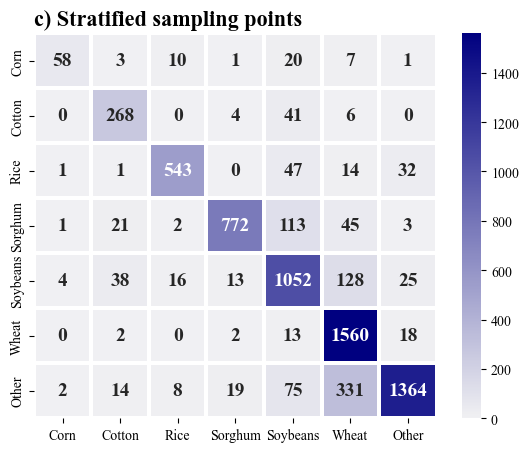

In [3]:
# Evaluate the classified model
# Define class labels and plot title outside the function
class_labels = ['Corn', 'Cotton', 'Rice', 'Sorghum', 'Soybeans', 'Wheat', 'Other']
plot_title = 'c) Stratified sampling points'
base_dir = r'C:\crop_classification'
# Locate the test sample points
test_samples = r'C:\crop_classification\results\test_dataset\test_dataset.shp'
# Located the classified images
predicted_img = r'C:\crop_classification\results\classified_images\stratified_classified.tif'
# Save metrics
metrics_output = 'stratified_metrics.xlsx'
# Save the confusion matrix
confusin_matrix_output = 'stratified_0.05%.png'

# Run the function to create the evaluation metrics and the confusion matrix
model_evaluator.evaluation_metrics(base_dir, test_samples, predicted_img, metrics_output, confusin_matrix_output,
                       class_labels, plot_title)
